In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
G = 6.67430e-11 
c = 3.0e8        # (m/s)
M_sun = 1.989e30 # (kg)
parsec = 3.086e16 # (m)

In [5]:
def LIGO_Sn(f):
    f0 = 215 
    S_n = (1e-49 * (f / f0)**-4.14 +
           1e-50 * (f / f0)**-0.69 +
           1e-52 * (f / f0)**2.145)
    return S_n

def ligo_sensitivity(f):
    return np.sqrt(f * LIGO_Sn(f)) 

# LISA parameters
L = 2.5e9  # Arm length
f_star = c / (2 * np.pi * L)  # Transfer frequency (Hz)

# Noise components
def P_oms(f):
    return (1.5e-11)**2 * (1 + (2e-3 / f)**4)

def P_acc(f):
    return (3e-15)**2 * (1 + (0.4e-3 / f)**2) * (1 + (f / 8e-3)**4)

def S_c(f):
    A = 9e-45
    alpha, beta, kappa, gamma, f_k = 0.138, -221, 521, 1680, 0.00113
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

def S_n(f):
    return (10 / (3 * L**2)) * (P_oms(f) + 4 * P_acc(f) / (2 * np.pi * f)**4) * (1 + 0.6 * (f / f_star)**2) + S_c(f)

# LISA sensitivity curve
def h_n(f):
    return np.sqrt(f * S_n(f))


In [7]:

# Frequency range
f = np.logspace(-4, 4, 1000)


# LIGO sensitivity curve
ligo_sensitivity_curve = ligo_sensitivity(f)

# Compute LISA sensitivity curve
sensitivity_curve = h_n(f)

# Characteristic strain functions
def h_c_stochastic(f, Omega_gw):
    H_0 = 67.4 * 1e3 / (3.086e19)  # (s^-1)
    return np.sqrt((3 * H_0**2) / (2 * np.pi**2) * Omega_gw * f**-2)

def h_c_continuous(f, epsilon, I, r):
    return (4 * G * epsilon * I * f**2) / (c**4 * r)

def h_c_burst(f, E_gw, r):
    return (1 / r) * np.sqrt((2 * G * E_gw) / (np.pi**2 * c**3 * f**2))

def h_c_CBC(f, M_chirp, r):
    return (8 / np.sqrt(10)) * (G * M_chirp / c**3)**(5/6) * (np.pi**(2/3) * f**(-7/6)) / r

# Parameters for different sources
# Stochastic
Omega_gw = 1e-10  # Example energy density

# Continuous
epsilon = 1e-6  # Ellipticity
I = 1e38  # (kg m^2)
r_continuous = 1e3 * parsec

# Burst
E_gw = 1e44
r_burst = 1e3 * parsec

# Compact Binary Coalescence
M1 = 1.4 * M_sun
M2 = 1.4 * M_sun
M_chirp = (M1 * M2)**(3/5) / (M1 + M2)**(1/5)  # Chirp mass
r_CBC = 40 * parsec

# Compute characteristic strains
h_c_stochastic_f = h_c_stochastic(f, Omega_gw)
h_c_continuous_f = h_c_continuous(f, epsilon, I, r_continuous)
h_c_burst_f = h_c_burst(f, E_gw, r_burst)
h_c_CBC_f = h_c_CBC(f, M_chirp, r_CBC)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_19868\1911612793.py:25: RuntimeWarning: overflow encountered in exp
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))
C:\Users\Vasudev\AppData\Local\Temp\ipykernel_19868\1911612793.py:25: RuntimeWarning: invalid value encountered in multiply
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))


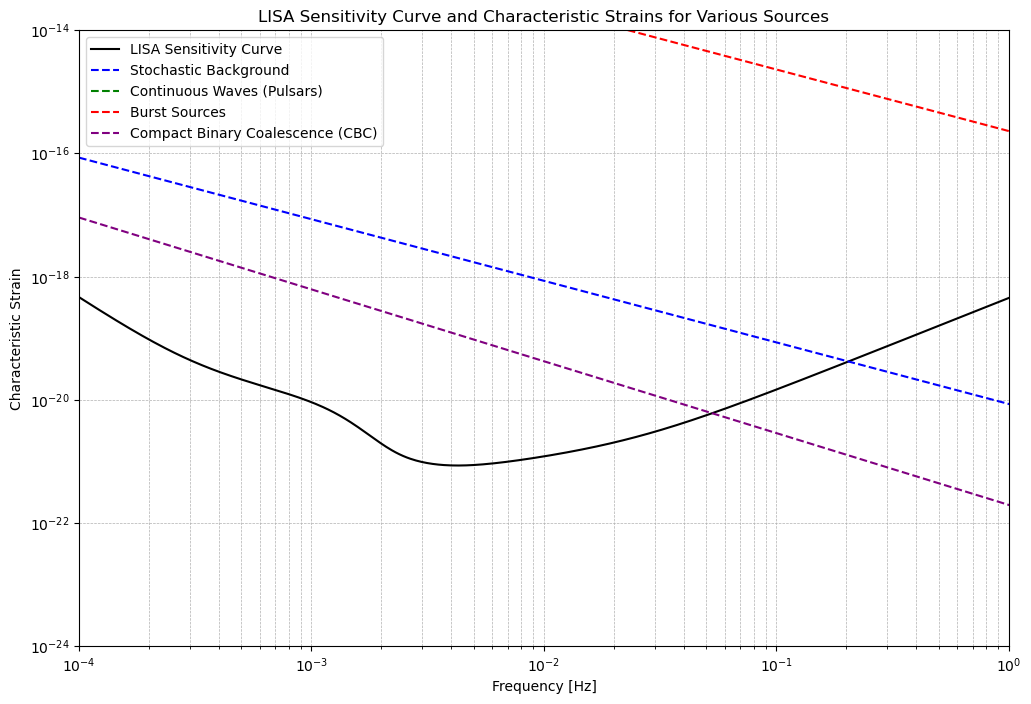

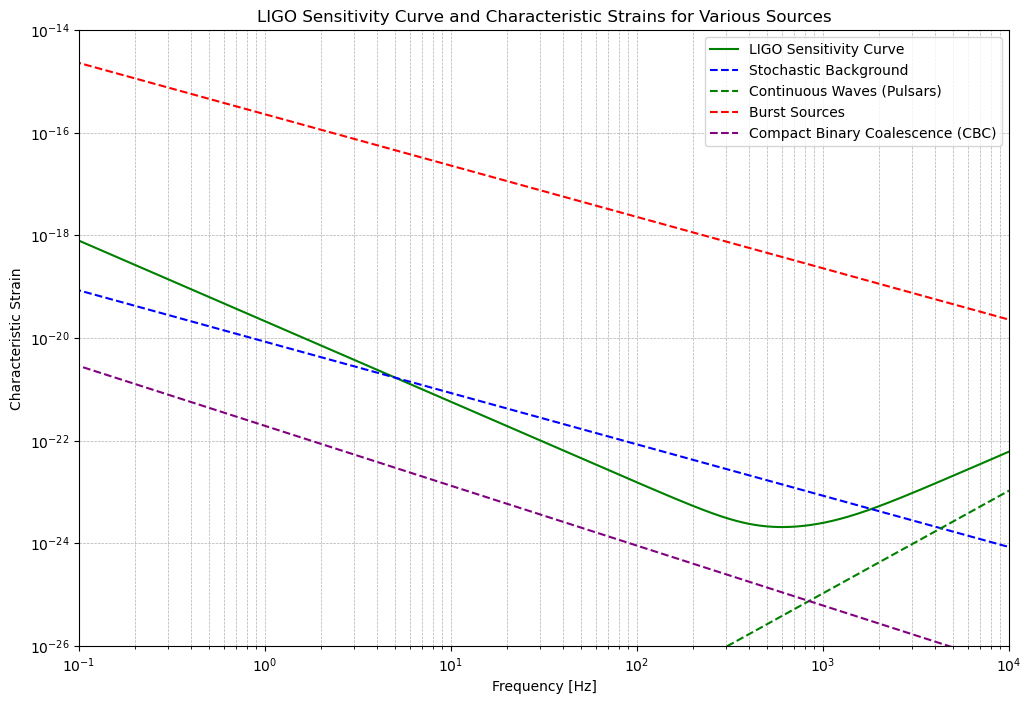

In [8]:

# Plotting for LISA
plt.figure(figsize=(12, 8))
plt.loglog(f, sensitivity_curve, label='LISA Sensitivity Curve', color='black')
plt.loglog(f, h_c_stochastic_f, label='Stochastic Background', linestyle='--', color='blue')
plt.loglog(f, h_c_continuous_f, label='Continuous Waves (Pulsars)', linestyle='--', color='green')
plt.loglog(f, h_c_burst_f, label='Burst Sources', linestyle='--', color='red')
plt.loglog(f, h_c_CBC_f, label='Compact Binary Coalescence (CBC)', linestyle='--', color='purple')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.title('LISA Sensitivity Curve and Characteristic Strains for Various Sources')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.ylim(1e-24, 1e-14)
plt.xlim(1e-4, 1)
plt.show()


# Plotting for LIGO
plt.figure(figsize=(12, 8))
plt.loglog(f, ligo_sensitivity_curve, label='LIGO Sensitivity Curve', color='green')
plt.loglog(f, h_c_stochastic_f, label='Stochastic Background', linestyle='--', color='blue')
plt.loglog(f, h_c_continuous_f, label='Continuous Waves (Pulsars)', linestyle='--', color='green')
plt.loglog(f, h_c_burst_f, label='Burst Sources', linestyle='--', color='red')
plt.loglog(f, h_c_CBC_f, label='Compact Binary Coalescence (CBC)', linestyle='--', color='purple')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.title('LIGO Sensitivity Curve and Characteristic Strains for Various Sources')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.ylim(1e-26, 1e-14)
plt.xlim(1e-1, 1e4)
plt.show()

